In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

# Import Data

In [37]:
import pandas as pd
trainingset = pd.read_csv(r"C:\Users\cristian\Downloads\trainingset.csv")
devset = pd.read_csv(r"C:\Users\cristian\Downloads\devset.csv")
trainingset.head()

,Gender,Height,Weight
0,Female,154,132
1,Male,191,62
2,Female,167,135
3,Male,171,141
4,Female,179,103


In [38]:
# Changes tag Male and Female to 1 & 0 
trainingset['Gender'].replace('Male',1, inplace=True)
trainingset['Gender'].replace('Female',0, inplace=True)
devset['Gender'].replace('Male',1, inplace=True)
devset['Gender'].replace('Female',0, inplace=True)

#Charges data
X = np.array([trainingset["Height"],trainingset["Weight"]])
X_test=np.array([devset["Height"],devset["Weight"]])
Y = np.array([trainingset["Gender"]])
Y_test = np.array([devset["Gender"]])
X = X.T
y = Y.T
print("training shape")
print(X.shape)
print(Y.shape)
print("dev shape")
print(X_test.shape)
print(Y_test.shape)
print("X=" + str(X))
print("Y=" + str(Y))

training shape
(392, 2)
(1, 392)
dev shape
(2, 98)
(1, 98)
X=[[154 132]
 [191  62]
 [167 135]
 [171 141]
 [179 103]
 [144  66]
 [187  94]
 [142 159]
 [142 131]
 [169  97]
 [151 114]
 [140 129]
 [189 104]
 [147  92]
 [174  90]
 [172  75]
 [190 105]
 [181  51]
 [174  65]
 [170 156]
 [160 139]
 [144  80]
 [177 117]
 [166 144]
 [155  71]
 [178 154]
 [173  82]
 [159 104]
 [182  98]
 [170 115]
 [161  72]
 [152  90]
 [182 126]
 [184  83]
 [153 107]
 [169 103]
 [150 119]
 [154 105]
 [168  59]
 [180  73]
 [164  82]
 [188 100]
 [188  57]
 [157 110]
 [184  86]
 [193  65]
 [191  54]
 [175 120]
 [169 145]
 [172 105]
 [158  96]
 [184 132]
 [155 111]
 [164  70]
 [183 138]
 [140 146]
 [195  69]
 [183 105]
 [160 131]
 [196 131]
 [179 110]
 [169  88]
 [168  87]
 [184 160]
 [182 104]
 [163  63]
 [195  98]
 [168 140]
 [140  76]
 [191  62]
 [179 114]
 [170  81]
 [145  79]
 [167  85]
 [151 158]
 [168 148]
 [192  90]
 [147  84]
 [148  60]
 [175 135]
 [183  96]
 [155 144]
 [177 117]
 [187 140]
 [151  82]
 [14

# Normalization 

In [39]:
m = X.shape[0]
mu = np.sum((X))/m
sigma = np.sum((X)**2)/m
X = (X-mu)/sigma
X

array([[-0.00293801, -0.00346901],
       [-0.00204495, -0.00515857],
       [-0.00262423, -0.0033966 ],
       [-0.00252768, -0.00325178],
       [-0.00233459, -0.00416897],
       [-0.00317937, -0.00506202],
       [-0.0021415 , -0.0043862 ],
       [-0.00322764, -0.00281732],
       [-0.00322764, -0.00349315],
       [-0.00257596, -0.00431379],
       [-0.00301042, -0.00390347],
       [-0.00327592, -0.00354142],
       [-0.00209323, -0.00414483],
       [-0.00310696, -0.00443447],
       [-0.00245528, -0.00448274],
       [-0.00250355, -0.00484479],
       [-0.00206909, -0.00412069],
       [-0.00228632, -0.00542407],
       [-0.00245528, -0.00508616],
       [-0.00255182, -0.00288973],
       [-0.00279319, -0.00330005],
       [-0.00317937, -0.00472411],
       [-0.00238287, -0.00383106],
       [-0.00264837, -0.00317937],
       [-0.00291387, -0.00494134],
       [-0.00235873, -0.00293801],
       [-0.00247941, -0.00467583],
       [-0.00281732, -0.00414483],
       [-0.00226218,

# Model

In [40]:
import tensorflow as tf
from tensorflow import keras
# load the dataset
dataset = None
# split into input (X) and output (y) variables
# define the keras model
model = keras.Sequential()
model.add(layers.Dense(3, input_dim= 2, activation='tanh', name="layer1"))
model.add(layers.Dense(1, activation='sigmoid', name="layer2"))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10)

# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150
392/392 [==============================] - 1s 2ms/sample - loss: 0.6934 - acc: 0.4872
Epoch 2/150
392/392 [==============================] - 0s 260us/sample - loss: 0.6935 - acc: 0.5000
Epoch 3/150
392/392 [==============================] - 0s 319us/sample - loss: 0.6934 - acc: 0.4719
Epoch 4/150
392/392 [==============================] - 0s 237us/sample - loss: 0.6934 - acc: 0.4719
Epoch 5/150
392/392 [==============================] - 0s 277us/sample - loss: 0.6934 - acc: 0.5000
Epoch 6/150
392/392 [==============================] - 0s 338us/sample - loss: 0.6934 - acc: 0.5000
Epoch 7/150
392/392 [==============================] - 0s 376us/sample - loss: 0.6934 - acc: 0.5026
Epoch 8/150
392/392 [==============================] - 0s 319us/sample - loss: 0.6935 - acc: 0.5000
Epoch 9/150
392/392 [==============================] - 0s 272us/sample - loss: 0.6934 - acc: 0.4923
Epoch 10/150
392/392 [==============================] - 0s 323us/sample - loss: 0.6934 - acc: 0.5000
E

# Conclusion
Result is 50% accuracy, this make sense because data is similar as men as women.

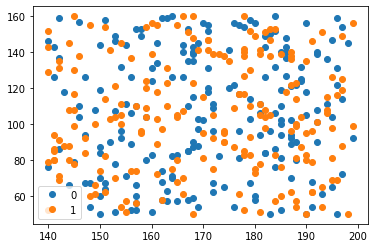

In [41]:
import matplotlib.pyplot as plt
                                #aqui tu x                      #aqui tu y                    #aqui el label
data = pd.DataFrame({"X Value": trainingset["Height"], "Y Value": trainingset["Weight"], "Category": trainingset["Gender"]})
groups = data.groupby("Category")

for name, group in groups:
    plt.plot(group["X Value"], group["Y Value"], marker="o", linestyle="", label=name)
plt.legend()

In [42]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 3)                 9         
_________________________________________________________________
layer2 (Dense)               (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________
